# Explore here

In [1]:
import pandas as pd
#Paso 1: Recopilación de datos

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.to_csv("../data/raw/bank_data.csv", index = False)

In [3]:
#Paso 2: Exploración y limpieza de datos
#obtener dimensiones, el dataframe tiene 41188 filas y 21 columnas (variables)
df.shape

(41188, 21)

In [4]:
# Revisamos data, en particular valores no nulos y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. Variables Numéricas: 'age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'
2. Variables Categóricas: 'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'

In [16]:
#Eliminar información irrelevante, elementos que correlacionados a y(tomar deposito) es menor a 0,1
df.drop(["age", "marital", "job", "education",'housing','loan','day_of_week','campaign','cons.conf.idx'], axis = 1, inplace = True)
df.head()


,default,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,no,telephone,may,261,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
1,unknown,telephone,may,149,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
2,no,telephone,may,226,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
3,no,telephone,may,151,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
4,no,telephone,may,307,999,0,nonexistent,1.1,93.994,4.857,5191.0,0


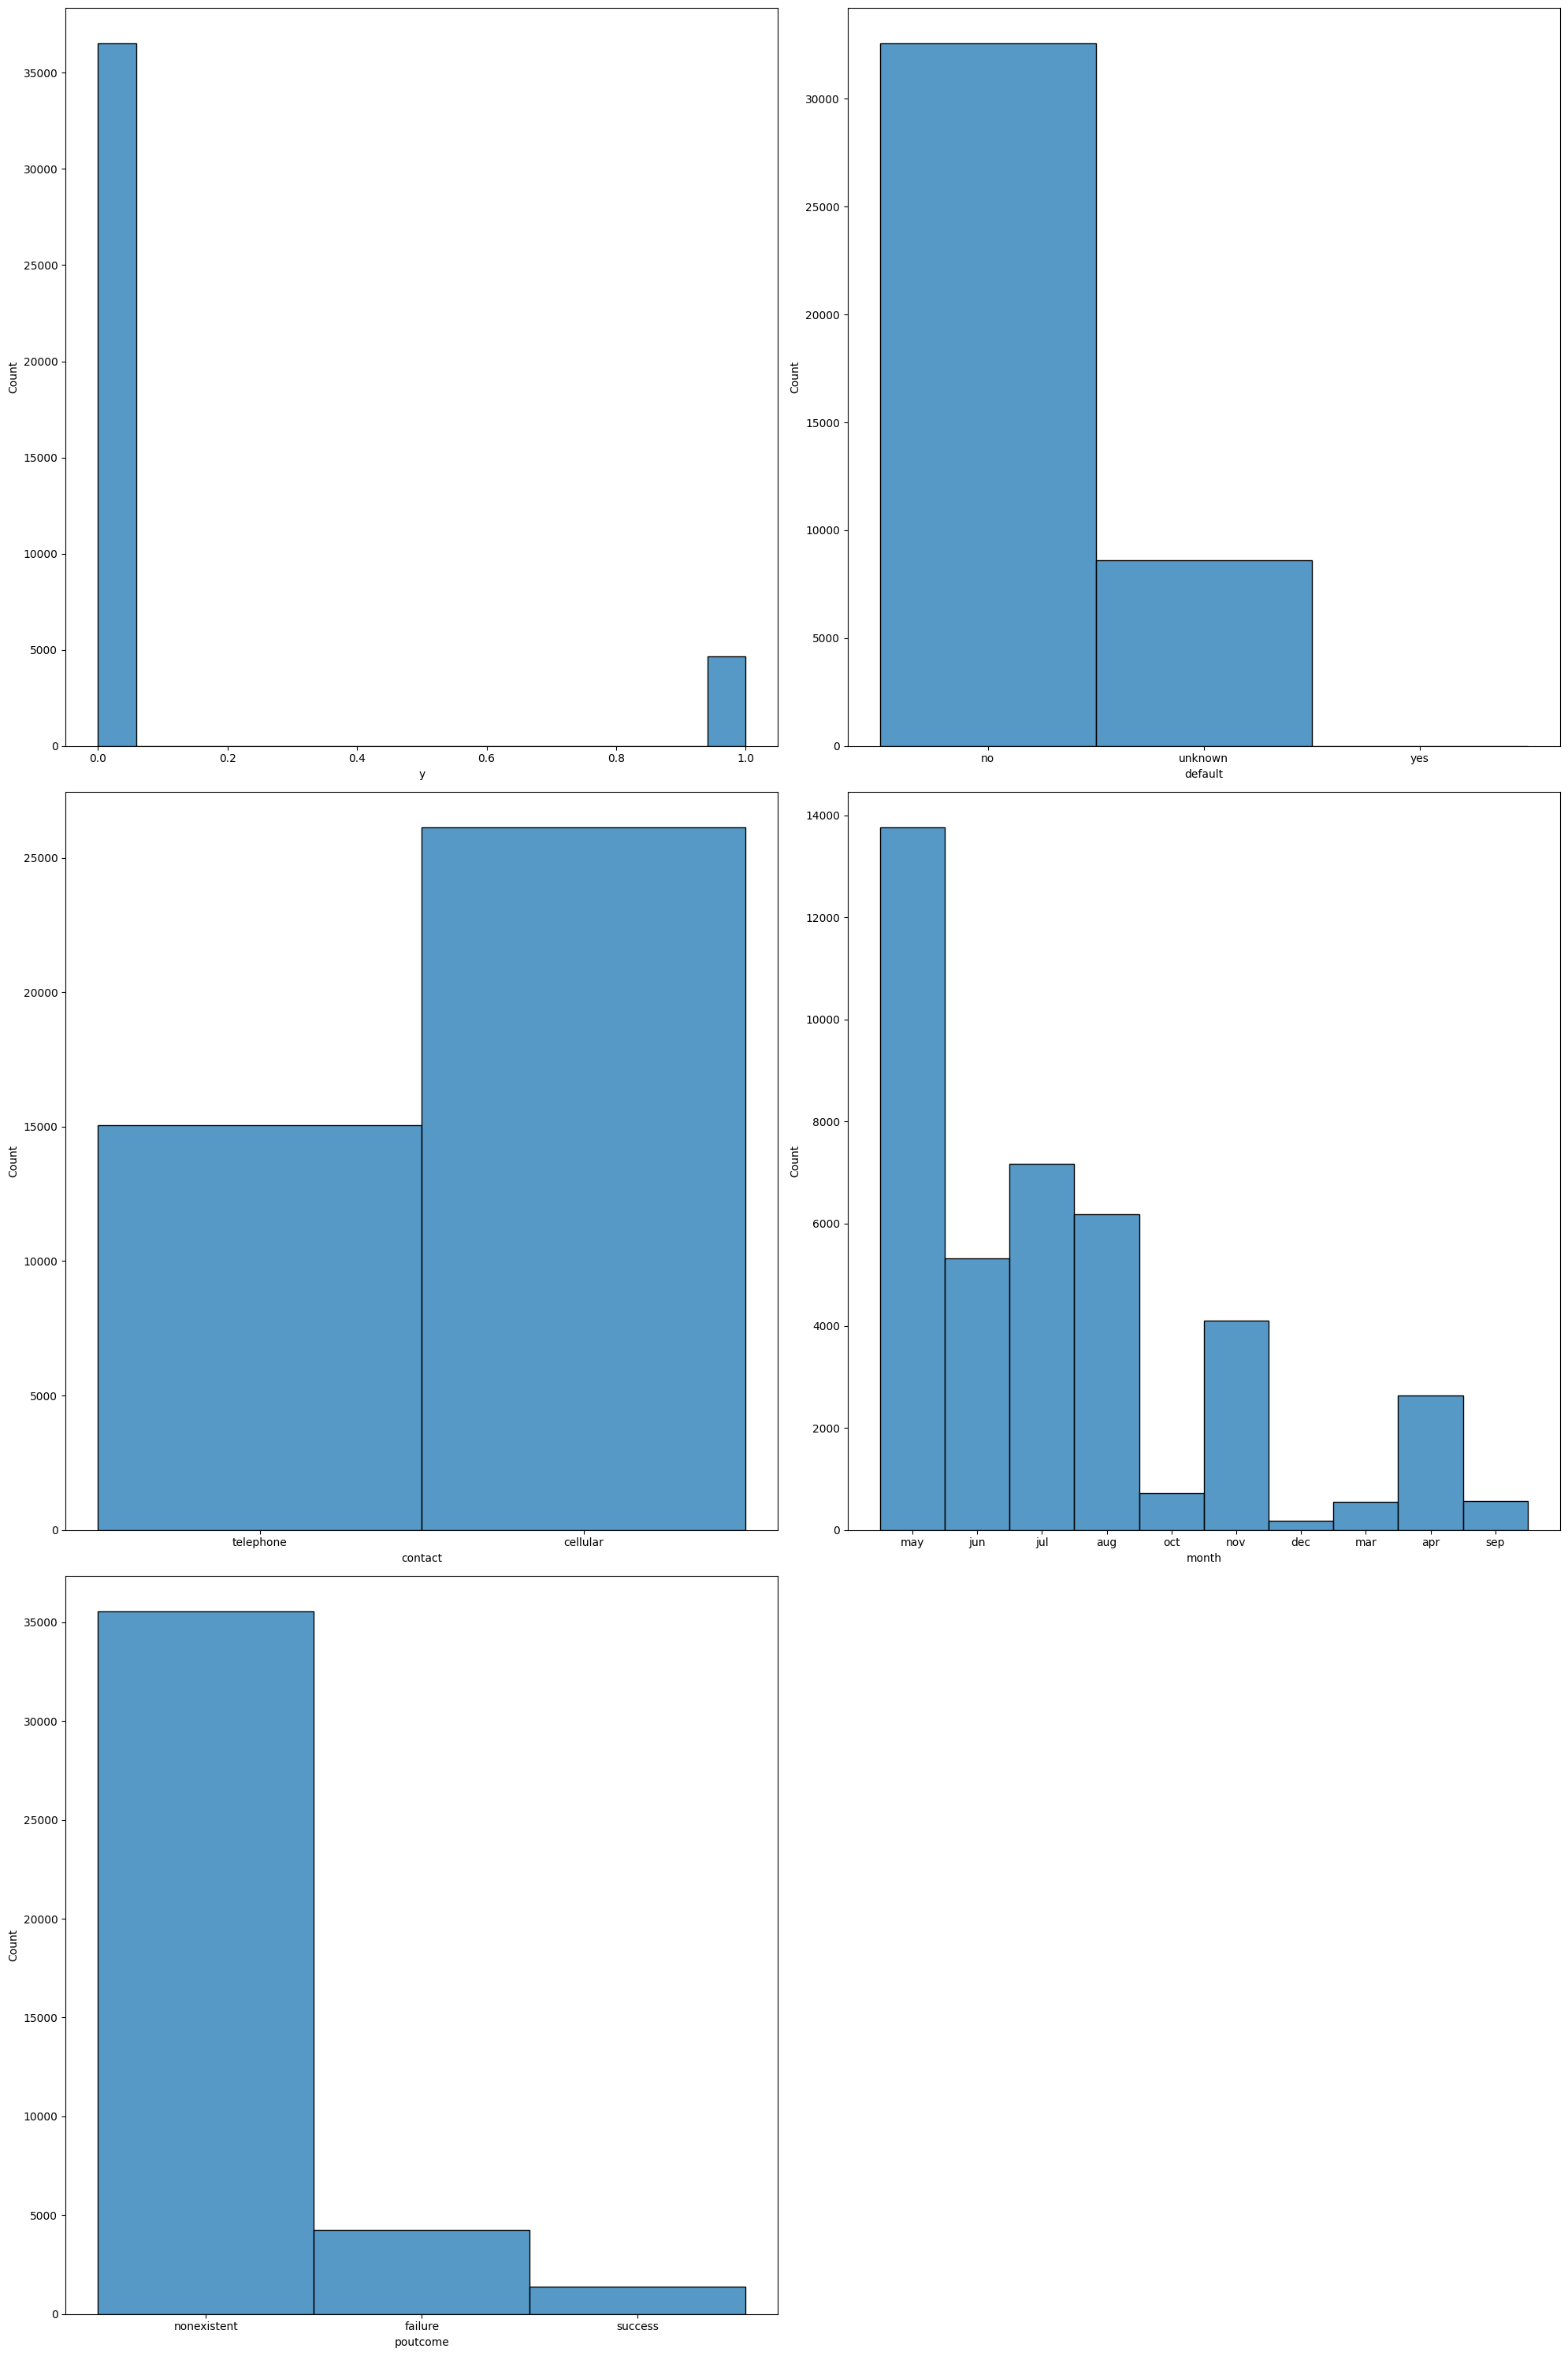

In [21]:

#Paso 3: Análisis de variables univariadas

#Analisis de variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize=(20, 30))

# Create Histogram
sns.histplot(ax = axis[0,0], data = df, x = "y")

sns.histplot(ax = axis[0,1], data = df, x = "default")

sns.histplot(ax = axis[1,0], data = df, x = "contact")
sns.histplot(ax = axis[1,1], data = df, x = "month")

sns.histplot(ax = axis[2,0], data = df, x = "poutcome")

fig.delaxes(axis[2, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

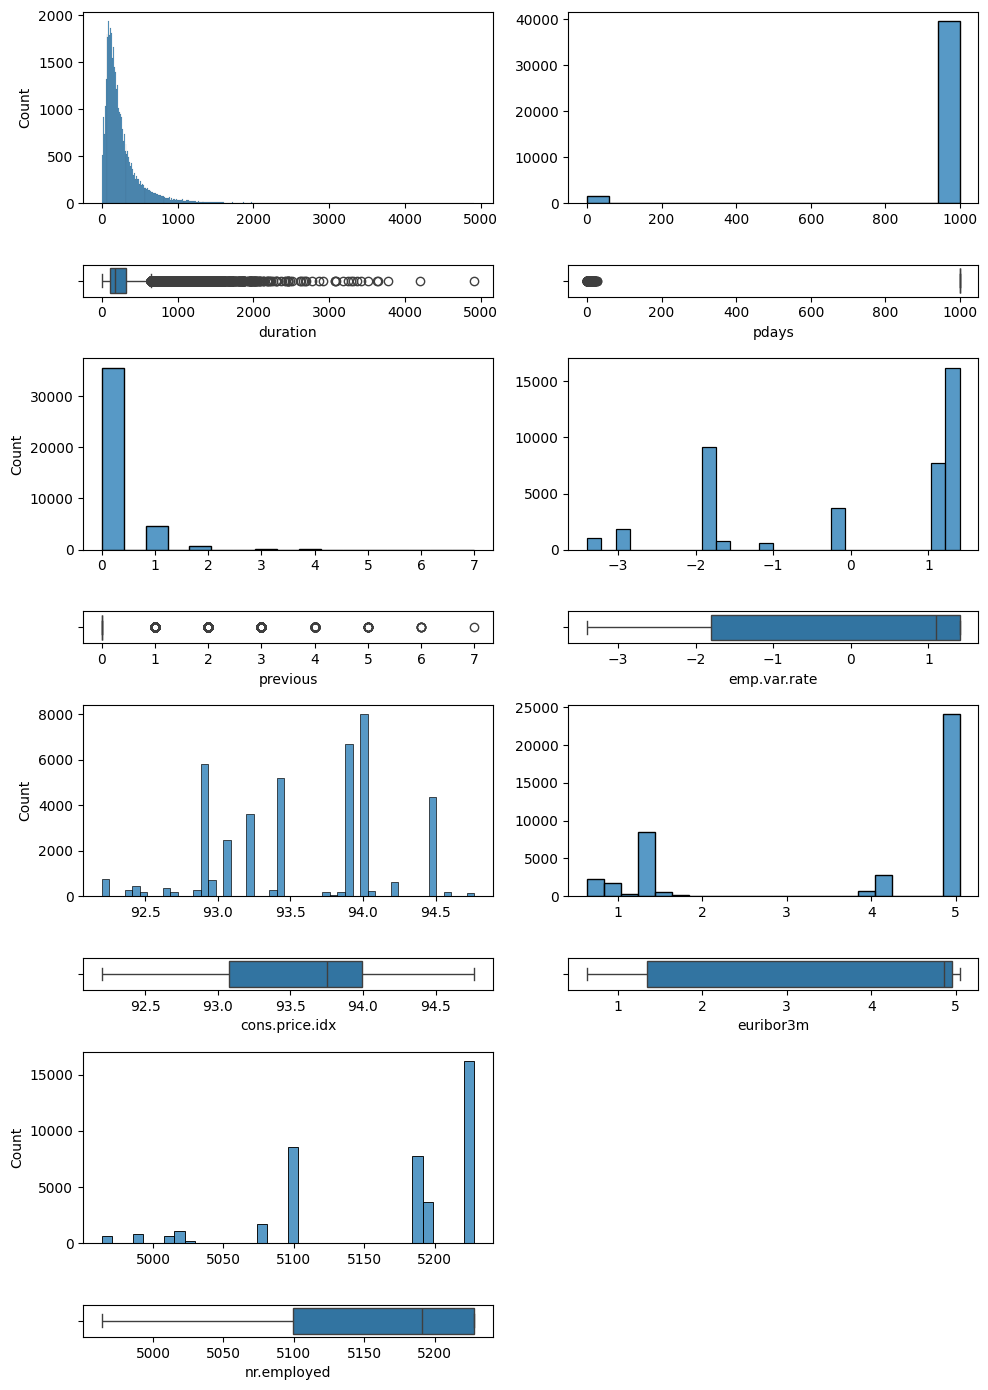

In [28]:
#Analisis de variables numéricas
#Variables Numéricas: 'duration','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed'
fig, axis = plt.subplots(8, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6, 1,6,1]})

sns.histplot(ax = axis[0, 0], data = df, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "duration")

sns.histplot(ax = axis[0, 1], data = df, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "pdays")

sns.histplot(ax = axis[2, 0], data = df, x = "previous").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "previous")

sns.histplot(ax = axis[2,1], data = df, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "emp.var.rate")

sns.histplot(ax = axis[4, 0], data = df, x = "cons.price.idx").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[4,1], data = df, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "euribor3m")

sns.histplot(ax = axis[6, 0], data = df, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "nr.employed")
fig.delaxes(axis[6, 1])
fig.delaxes(axis[7, 1])
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Variables Categóricas: 'default','contact','month','poutcome','y'

Variables Numéricas: 'duration','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed'

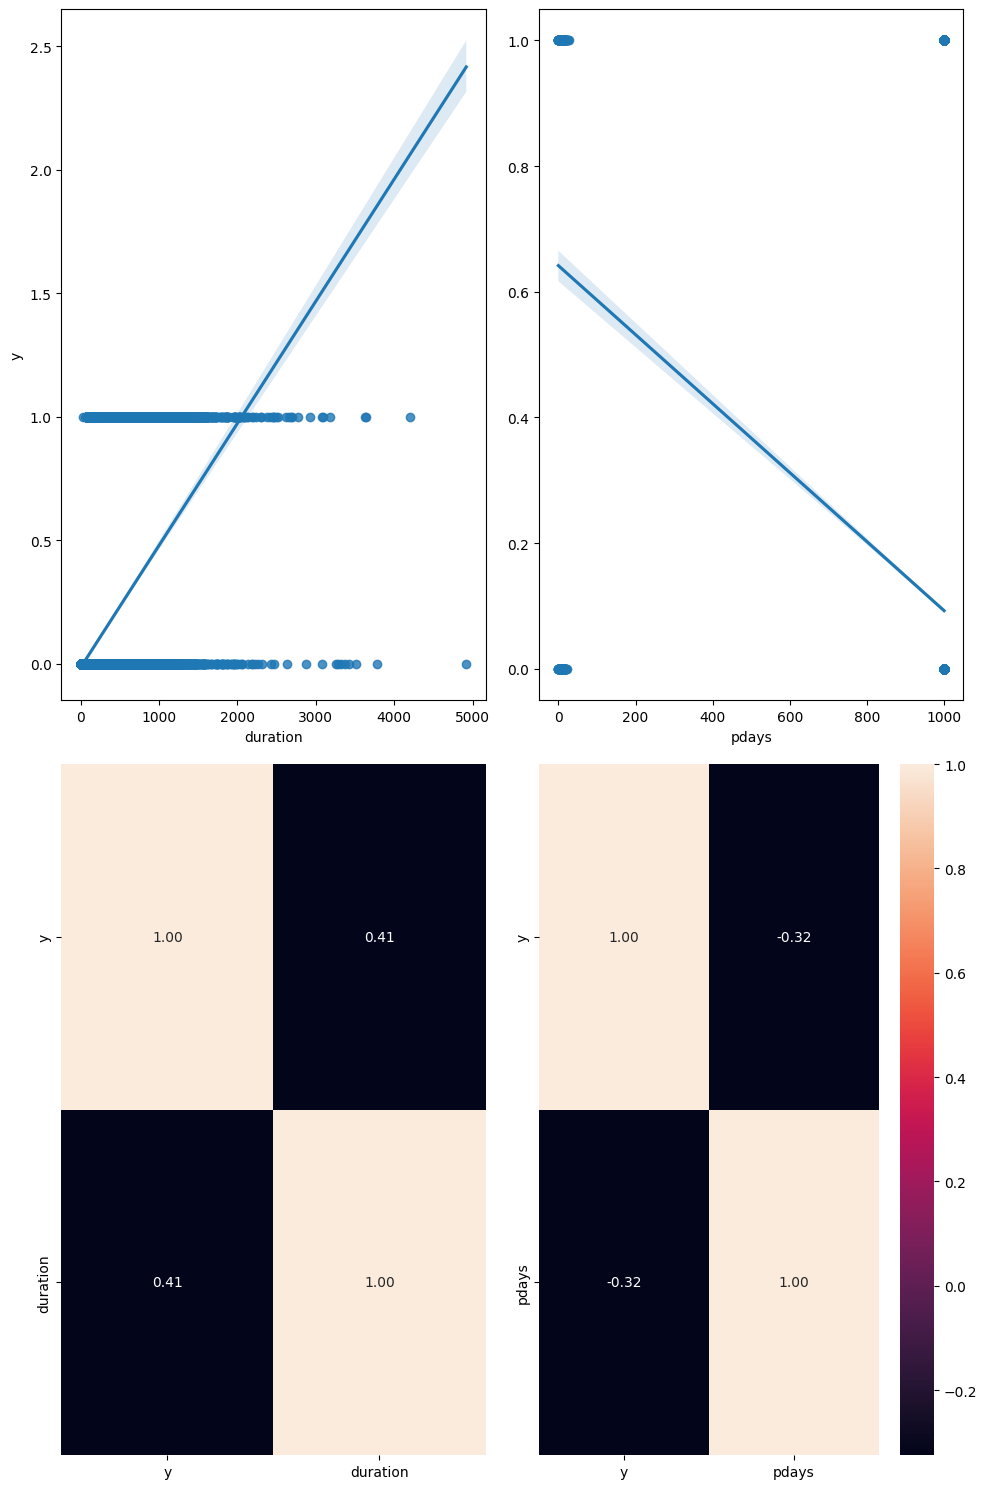

In [30]:
#Toma deposito (y) - (duration,pdays)
df["y"] = pd.factorize(df["y"])[0]
fig, axis = plt.subplots(2, 2, figsize = (10, 15))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "duration", y = "y")
sns.heatmap(df[["y", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "pdays", y = "y").set(ylabel=None)
sns.heatmap(df[["y", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


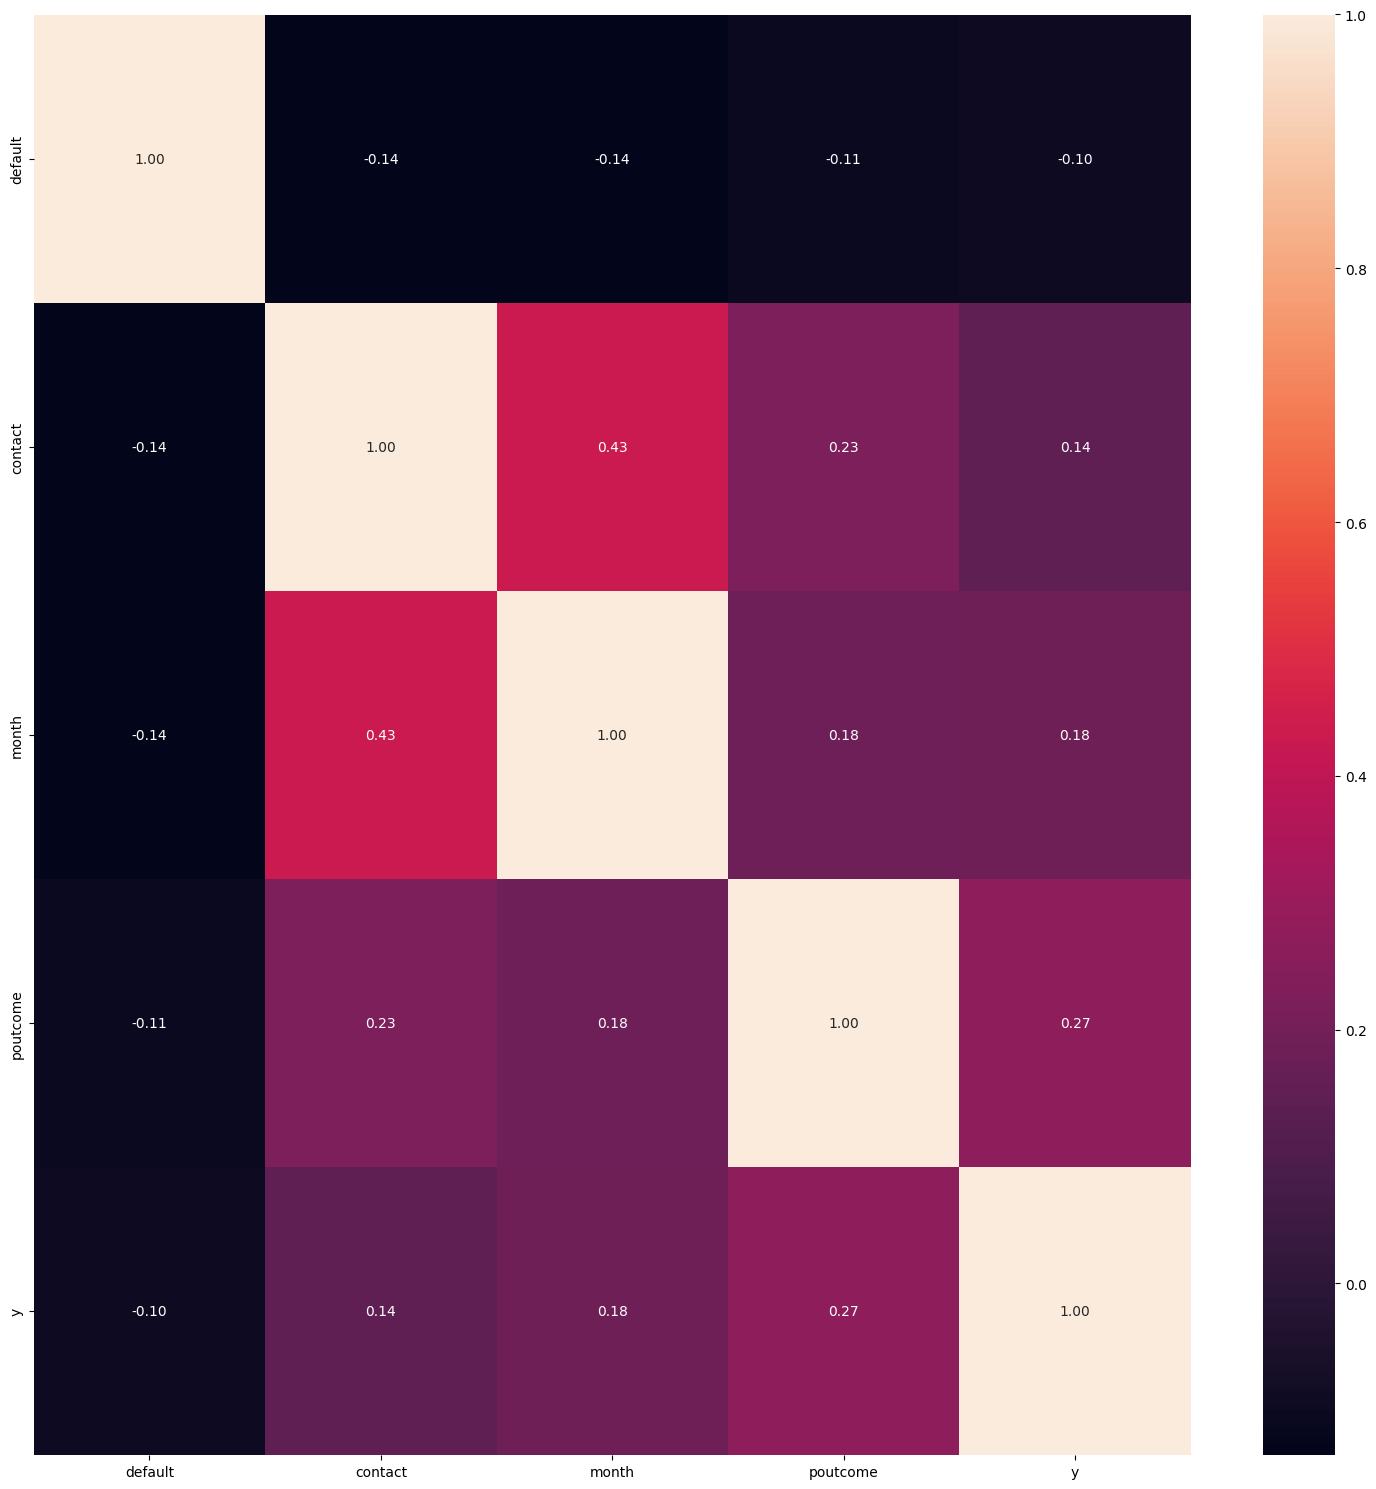

In [31]:

#Paso 4: Análisis de variables multivariadas
#Análisis numérico-numérico
# Factorixzar variables categóricas

df["default"] = pd.factorize(df["default"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[['default','contact','month','poutcome','y']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

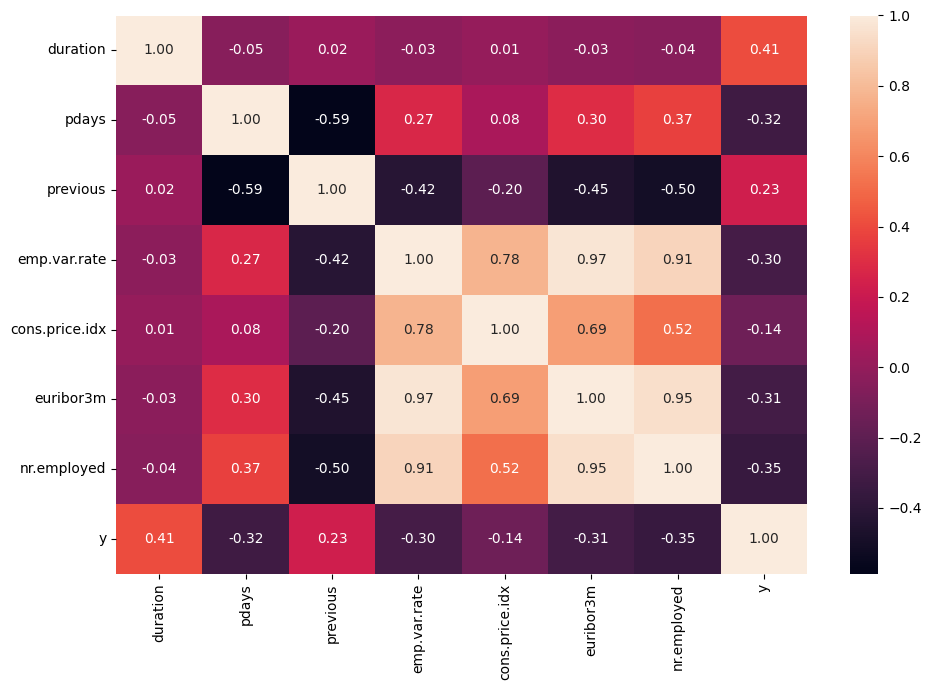

In [32]:
#'age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[['duration','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed','y']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

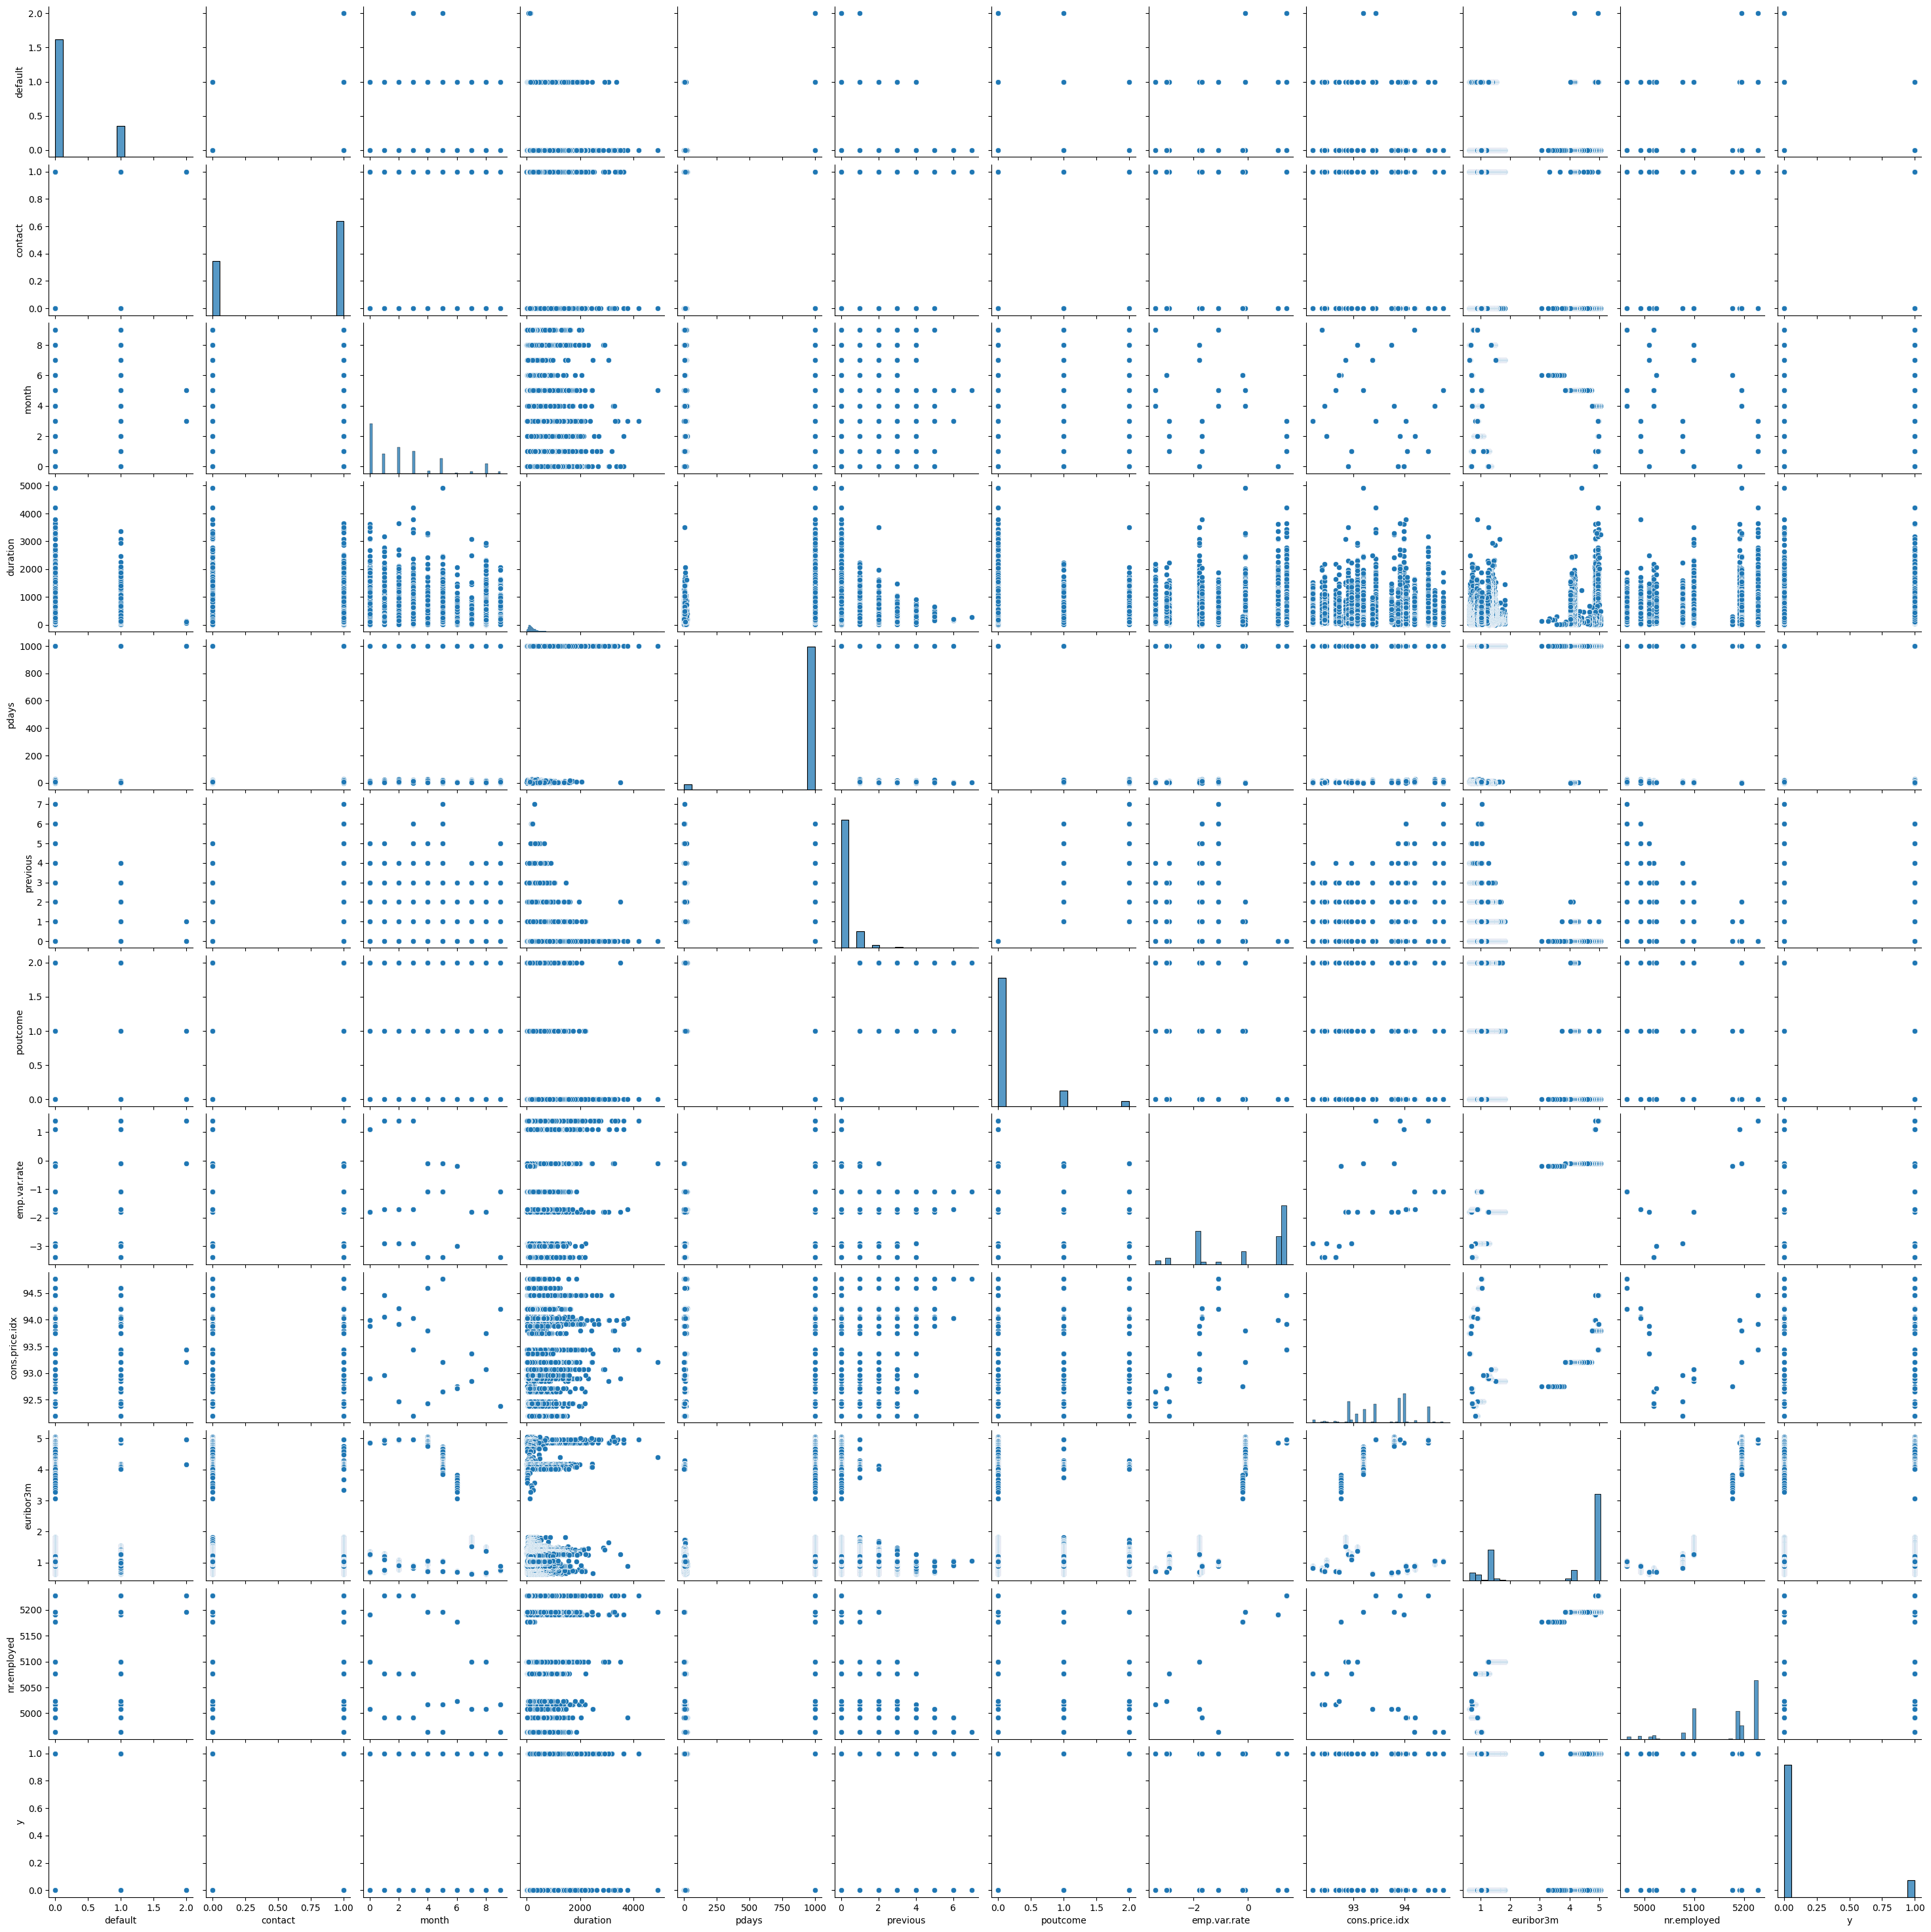

In [33]:
#analizar todos los datos al mismo tiempo
sns.pairplot(data = df)

In [34]:
#Análisis de valores atípicos
df.describe()

,default,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.208872,0.634748,2.250097,258.285010,962.475454,0.172963,0.169904,0.081886,93.575664,3.621291,5167.035911,0.112654
std,0.406686,0.481507,2.429079,259.279249,186.910907,0.494901,0.455754,1.570960,0.578840,1.734447,72.251528,0.316173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,0.000000,102.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000
50%,0.000000,1.000000,2.000000,180.000000,999.000000,0.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000
75%,0.000000,1.000000,3.000000,319.000000,999.000000,0.000000,0.000000,1.400000,93.994000,4.961000,5228.100000,0.000000
max,2.000000,1.000000,9.000000,4918.000000,999.000000,7.000000,2.000000,1.400000,94.767000,5.045000,5228.100000,1.000000


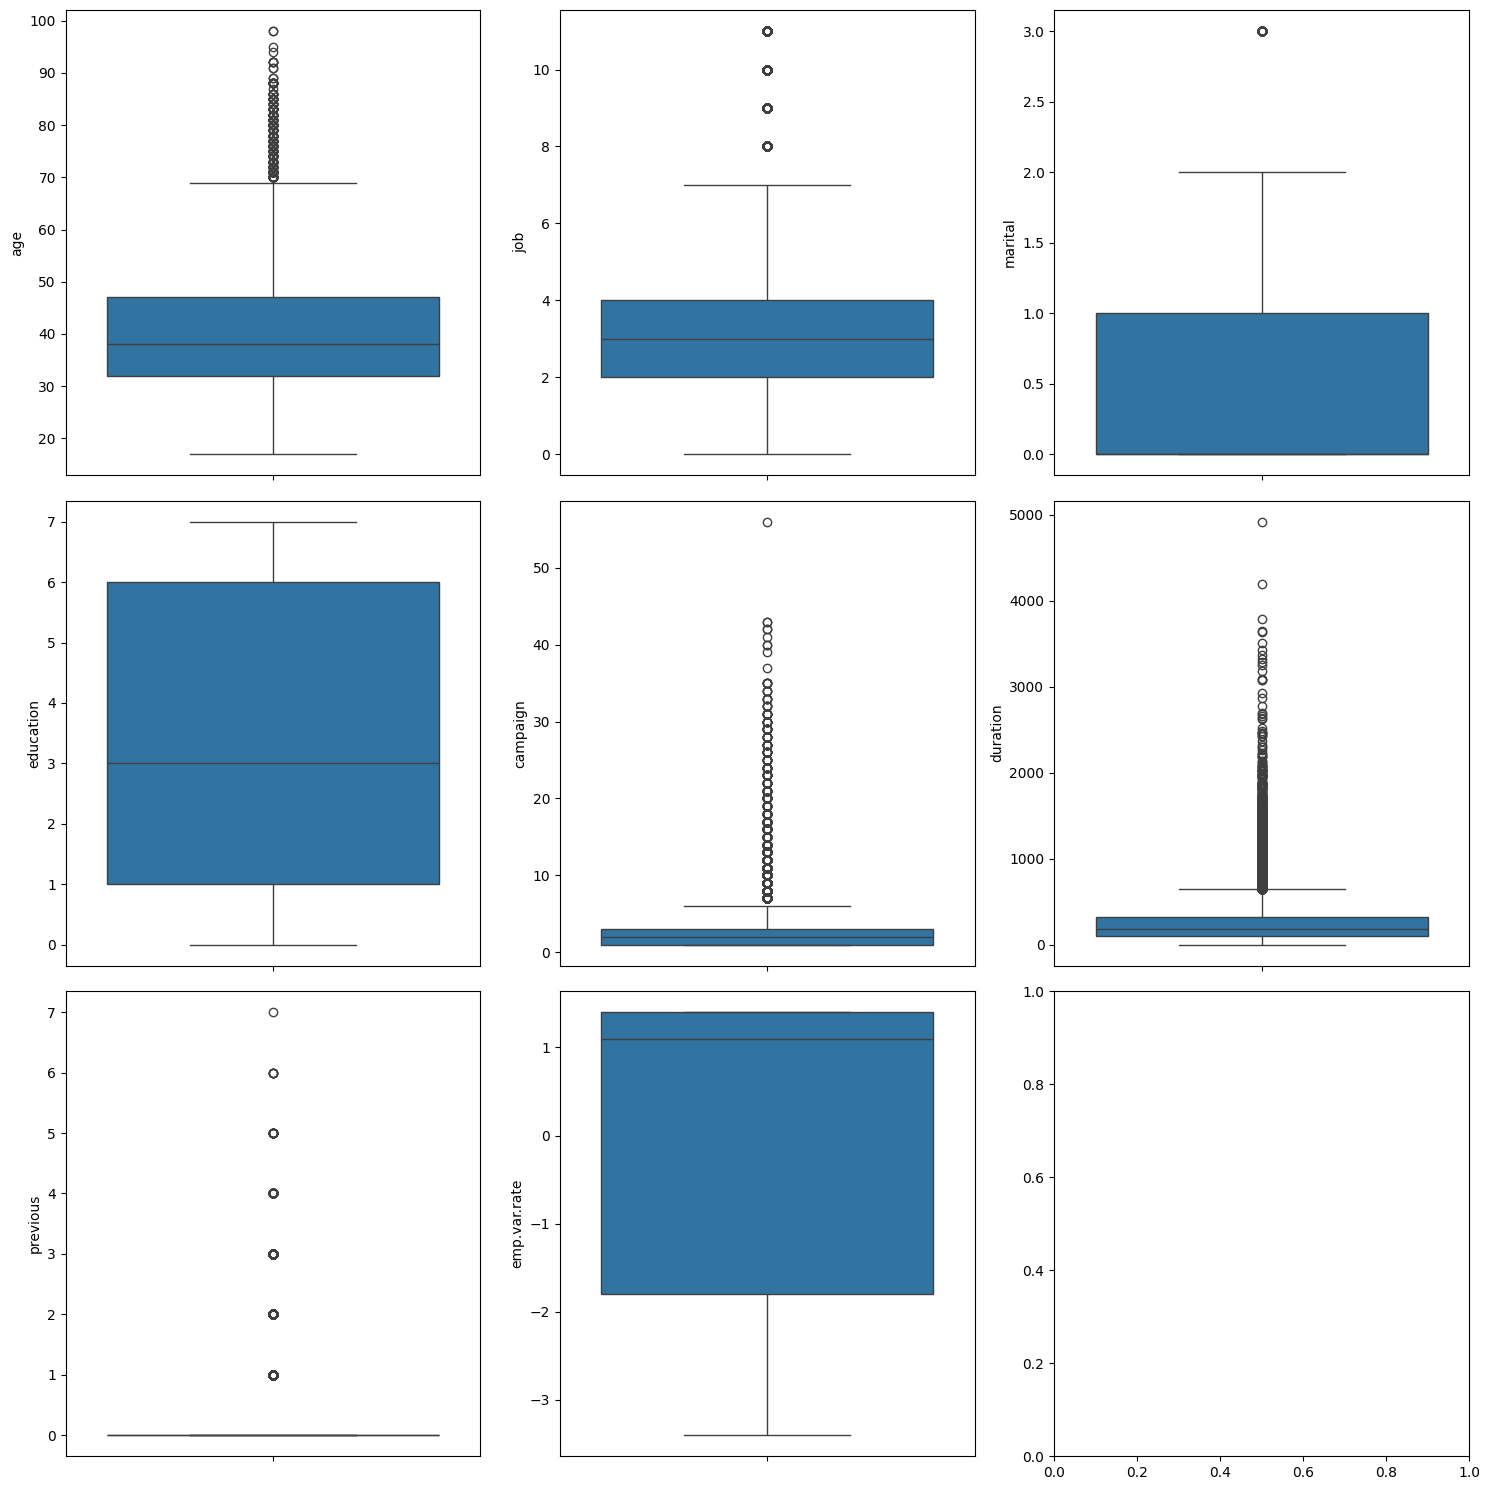

In [12]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "age")
sns.boxplot(ax = axes[0, 1], data = df, y = "job")
sns.boxplot(ax = axes[0, 2], data = df, y = "marital")
sns.boxplot(ax = axes[1, 0], data = df, y = "education")
sns.boxplot(ax = axes[1, 1], data = df, y = "campaign")
sns.boxplot(ax = axes[1, 2], data = df, y = "duration")
sns.boxplot(ax = axes[2, 0], data = df, y = "previous")
sns.boxplot(ax = axes[2, 1], data = df, y = "emp.var.rate")

plt.tight_layout()

plt.show()